
In computer Science, problems are divided into classes known as *Complexity Classes*; which are sets of problems with related complexity. 
- ***Polynomial (P)***: The class of problems *solved* in polynomial time, $O(n^k)$ for some constant $k$.
- ***Non-deterministic Polynomal (NP)***: The class of problems *verifiable* in polynomial time; and are *solvable* by non-deterministic machines (quantum computers) in polynomial time.
- ***Non-deterministic Polynomal-Hard (NP-Hard)***: A computational problem $H$ is called *NP-hard* if, for every problem $L$ which can be solved in non-deterministic polynomial-time, there is a ***polynomial-time reduction***(a method for solving one problem using another) from $L$ to $H$. That is, assuming a solution for $H$ takes 1 unit time, $H$ 's solution can be used to solve $L$ in polynomial time.
    - As a consequence, finding a polynomial time algorithm to solve a single *NP-hard* problem would give polynomial time algorithms for all the problems in the complexity class *NP*.
- ***Non-deterministic Polynomal-Complete (NP-Complete)***: This class of problems which are both *NP* and *NP-hard* (Hardest problems in *NP*).

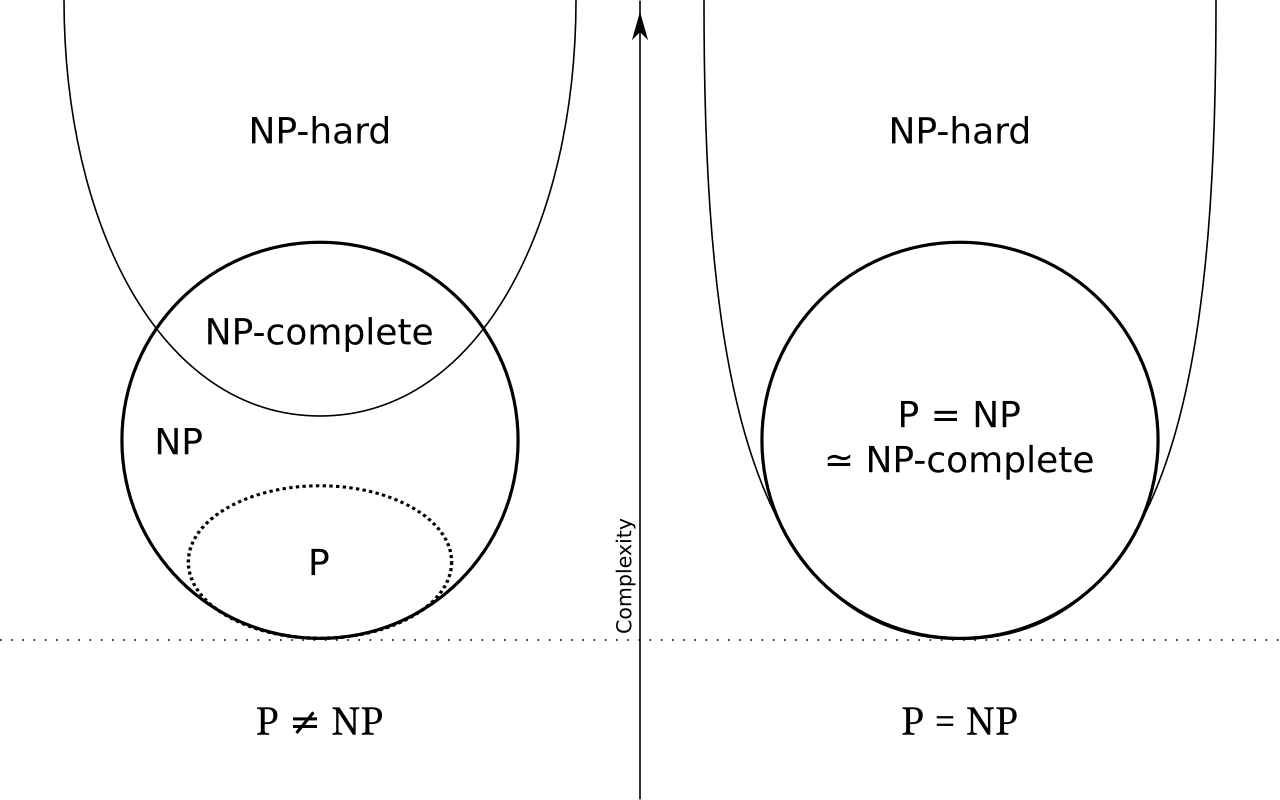
left-hand side are valid under the assumption that *P $\neq$ NP*, with the right-hand side having the assumption that *P $=$ NP*.
- **Example**) Finding the shortst path in a graph can be solved in $O(V^2)$ (*Dijkstra's algorithm*, etc.), meaning that it is a *P* problem. However, Finding a Hamiltonian cycle (simple cycle that contains each vertex $V$) in a directed graph $G(V,E)$ is an *NP* problem as verifyinf that a cycle is hamiltonian is polynomial $O(V)$. Additionally, the Hamiltonian cycle problem is an *NP-complete* problem. Furthermore, the Halting problem; determining from a description of an arbitrary computer program and an input whether the program will finish running, is an *NP-hard* problem.

**Very similar problems can have very different complexities**. A good demostration of this is the *Interval Scheduling* problem; where $1,\ldots,n$ requests require a single shared resource (more general forms can have an arbitrary number of shared resources), with each request having a start and finish times, $s(i)$ and $f(i)$ where $s(i)<f(i)$(interval of time). Two requests are compatible if they do not overlap, $f(i)\leq s(j)$ or $f(j)\leq s(i)$. The problem asks to select a compatible request subset of maximum size (schedule with the most requests)

In [23]:
# [O(n), O(n^2)] time O(n) space
function simple_interval_scheduling(requests::Vector{<:Tuple{<:Number, <:Number}}, verbose::Bool=false)
    if length(requests) ≤ 1
        return requests
    end
    sort!(requests)
    largestSubset = similar(requests, 0)
    headOfSubset = -1
    for (i, (startI, stopI)) in enumerate(requests)
        subset = similar(requests, 0)
        for (j, (startJ, stopJ)) in enumerate(requests[i+1:end]) 
            if startJ ≥ stopI
                push!(subset, (startJ, stopJ))
            end
        end
        if length(subset) > length(largestSubset)
            largestSubset = deepcopy(subset)
            headOfSubset = i
        end
    end
    verbose && println(largestSubset)
    return append!([requests[headOfSubset]], simple_interval_scheduling(largestSubset))
end 
simple_interval_scheduling([(0, 6), (1,4), (3,5), (3,8), (4,7), (5,9), (6,10), (8,11)])

3-element Vector{Tuple{Int64, Int64}}:
 (1, 4)
 (4, 7)
 (8, 11)

While the above solution solves the problem in polynomial time, there is a better method using a ***Greedy Algorithm***; a myopic procedure which does not look ahead of the current state of the problem, only looking to maximise it without regard to future processing (select element $i$ based on a simple rule $\rightarrow$ reject all elements that are incompatible with $i$ $\rightarrow$ reapeat untill all requests are processed).

Let $L=\{(s(i),f(i))\}_{i=1}^n$ where $f(i)>s(i)$ sorted by increasing $f(j)$, then, all intervals which are incompatible with $(s(1),f(1))$ are either; $s(i)\leq s(1) \cap f(i)\geq f(1)$ and $s(j)<f(1) \cap f(j)\geq f(1)$, and so are themselves incompatible with one another as $s(j)<f(i)$. Furthermore, it means that $f(1)\leq \min(f(i), f(j))$ which means that any *potential optimal* subset created using either $(s(i),f(i))$ or $(s(j),f(j))$ can also instead include $(s(1),f(1))$ with additional elements which can fit in the cap created by the use of the earliest finish time. Therefore, using this elements would potentially increase the *potential optimal subset* with elements which would have been incompatible with either $(s(i),f(i))$ or $(s(j),f(j))$ but compatible with the *potential optimal subset*. Repeating this method would generate the *optimal subset*.
-  **Proof** by *Induction*: Given the a list of intervals $L$, greedy algorithm with **earliest finish time** produces $k^*$ intervals, where $k^*$ is optimal. The base case of $k^*=1$ means that any interval is valid, and supposing the claim holds for $k^*$; then for $k^*+1$ the optimal schedule is given by $S^*[1,\ldots,k^*+1]=(s(j_1),f(j_1)),\ldots,(s(j_{k^*+1}),f(j_{k^*+1}))$ and that for some generic $k$ the greedy algorithm gives a list of intervals $S[1,\ldots,k]=(s(i_1),f(i_1)),\ldots,(s(i_k),f(i_k))$. It is true that $f(_1)\leq f(j_1)$ as th egreedy algorithm picks the earliest finish first, and so the schedule $S^{**}[1,\ldots,k^*+1]=(s(i_1),f(i_1)),\ldots,(s(j_{k^*+1}),f(j_{k^*+1}))$ as $(s(i_1),f(i_1))$ will not overlap with the interval $(s(j_2),f(j_2))$; thus this schedule is also optimal. Then, defining $L'$ as the set of itervals with $s(i)\geq f(i_1)$ and since $S^{**}$ is optimal for $L$, then $S^{**}[2,\ldots,k^*+1]$ is optimal for $L'$ of size $k^*$. Therefore, by the assumption it would mean that the greedy algorithm will produce an optimal schedule $S[2,\ldots,k^*+1]$ and therefore the new schedule $(s(i_1),f(i_1)), S[2,\ldots,k^*+1]$ generated by the greedy algorithm is optimal.

This reduces the complexity of the algorithm to $O(n\log n)$ due to the need to sort the array.

In [ ]:
# O(nlogn) time O(n) space
function simple_interval_scheduling(requests::Vector{<:Tuple{<:Number, <:Number}}, verbose::Bool=false)
    if length(requests) ≤ 1
        return requests
    end
    sort!(requests, by= x->x[2])
    largestSubset = similar(requests, 0)
    for (start, stop) in requests
        if isempty(largestSubset) || start ≥ largestSubset[end][2]
            push!(largestSubset, (start, stop))
        end
    end
    return largestSubset
end
simple_interval_scheduling([(0, 6), (1,4), (3,5), (3,8), (4,7), (5,9), (6,10), (8,11)])

3-element Vector{Tuple{Int64, Int64}}:
 (1, 4)
 (4, 7)
 (8, 11)

An alteration of the problem now requires the maximisation of schedule weight where each request $i$ has a correspondong weight $w(i)$. Even though this is a slight change, the greedy algorithm now cannot be used to solve this new problem; further, the initial solution also cannot solve this new scheduling problem. This is because, given a set of requests $R=\{x_i=(s(i),f(i),w(i))\}_{i=1}^{n}$ (ordered by $f(i)$), and $n$ subsets defined as $R_i=\{x_j\in R|s(j)\geq f(i)\}$; noting that only a single subset contains that optimal schedule, denoted as $R_o$ where $x_o$ is the optimal schedule subset's head. There exists solutions where the subset with the largest total weight ($\sum_{x_j\in R_i}w(j)$), $R_{\max}$, is not $R_o$; which exists when considering each subset as a tree, $R_{\max}$ creates a tree whose longest *root-to-leaf* is smaller than $R_o$ 's but whose overall tree weight is greater.

From this a new recursive algorithm can be constructed where $\text{Opt}(R)=\max_{1\leq i\leq n}\{w(i)+\text{Opt}(R_i)\}$; which populates a tree, retrieving the longest *root-to-leaf* path.

In [28]:
# O(n^2) time O(n^2) space
function weighted_interval_scheduling(
    requests::Vector{Tuple{Int, Int, Int}}, 
    head::Tuple{Int, Int, Int} = (-1, -1, 0), 
    cache::Dict{Tuple{Int, Int, Int}, Tuple{Int, Vector{Tuple{Int, Int, Int}}}} 
        = Dict{Tuple{Int, Int, Int}, Tuple{Int, Vector{Tuple{Int, Int, Int}}}}(), 
    verbose::Bool = false)
    if isempty(requests)
        return head[end], [head]
    end
    
    if haskey(cache, head)
        return cache[head]
    end
    sort!(requests, by = x -> x[2])

    maxWeight = 0
    maxSchedule = Tuple{Int, Int, Int}[]
    for (i, req) in enumerate(requests)
        if req[1] >= head[2]
            weight, schedule = weighted_interval_scheduling(requests[i+1:end], req, cache, verbose)
            if weight > maxWeight
                maxWeight = weight
                maxSchedule = schedule
            end
        end
    end

    result = (head[end] + maxWeight, [head; maxSchedule])
    cache[head] = result
    return result
end
weighted_interval_scheduling([(1,3,2), (3,4,1), (4,5,2), (1,2,1), (2,5,2)])

(5, [(-1, -1, 0), (1, 3, 2), (3, 4, 1), (4, 5, 2)])

Increasing the complexity of the problem again by introducing $m$ resources in the form of machine types $\tau=\{T_1,\ldots,T_m\}$ where each request $i$ has a start and end time, $s(i)$ and $f(i)$, as well as a set $Q(i)\subseteq\tau$ that represents the set of machien that the given request $i$ can be serviced on (each request has weight $1$). This is clearly an *NP* problem as given a solution, it would take $O(n)$ time to verify the subset of jobs with machine assignments is legal (cannot verify it is optimal).

Further, the decision problem "can $k\leq n$ requests be scheduled?" has been shown to be *NP-complete*; and calculating the maximum number of requests that should be scheduled is *NP-hard*.

In [35]:
function find_tangent(left::Vector{<:Tuple{<:Number,<:Number}}, right::Vector{<:Tuple{<:Number,<:Number}}, isParentLeftHandside::Bool)
    # list are treated as doubly linked list ordered in anti-clockwise ordering from point 
    # closest to L for Left and clockwise for Right

    L_x = (left[begin][1]+right[begin][1])/2
    function y(a_i::Tuple{<:Number,<:Number}, b_j::Tuple{<:Number,<:Number}, L_x::Number)
        m = (b_j[2] - a_i[2]) / (b_j[1] - a_i[1])
        L_y = a_i[2] + m*(L_x - a_i[1])
        return L_y       
    end

    function next(list::Vector{<:Tuple{<:Number,<:Number}}, i::Number)
        return mod(i,length(list))+1
    end

    function prev(list::Vector{<:Tuple{<:Number,<:Number}}, i::Number)
        return mod(i-2,length(list))+1
    end

    function search_tangent(left::Vector{<:Tuple{<:Number,<:Number}}, right::Vector{<:Tuple{<:Number,<:Number}}, L_x::Number; comp, step)
        i = 1
        j = 1
        while true
            move_right = comp(y(left[i], right[step(right, j)], L_x), y(left[i], right[j], L_x))
            move_left = comp(y(left[step(left, i)], right[j], L_x),y(left[i], right[j], L_x))
            if !(move_left || move_right)
                break
            end

            if move_right
                j = step(right, j)
            else
                i = step(left, i)
            end
        end
        return i, j
    end

    upper_tangent = search_tangent(left, right, L_x, comp = >, step = next)
    lower_tangent = search_tangent(left, right, L_x, comp = <, step = prev)
    println(upper_tangent)
    println(right[starting_point:-1:upper_tangent[2]])

    starting_point = findfirst(==(maximum(right)), right)
    convex = [right[starting_point:-1:upper_tangent[2]] ; left[upper_tangent[1]:1:lower_tangent[1]] ; right[lower_tangent[2]:-1:starting_point+1]]

    if isParentLeftHandside
        return convex
    end
    starting_point = findfirst(==(minimum(convex)), convex)
    return [convex[starting_point:-1:begin]; convex[end:-1:starting_point+1]]
end
find_tangent([(0,-1),(-2,4),(-4,0)], [(2,3),(5,-2)], true)

(2, 1)


UndefVarError: UndefVarError: `starting_point` not defined in local scope
Suggestion: check for an assignment to a local variable that shadows a global of the same name.

# Divide and Conquer
Given a problem of size $n$, divide it into subproblems of size $\frac{n}{b}$, where $a\geq 1$, $b>1$; solve each recursively, and combine their solutions to get the overall solution $$T(n)=aT(\frac{n}{b})+[\text{work for merge}]$$

## Convex Hull
Given $n$ points in the plane $S=\{(x_i,y_i)|i=1,\ldots,n\}$ assuming that **no two have the same $x$ or the same $y$ coordinates** (no vertical or horizontal lines), and no three points in a line (for convenience). *Convex Hull*, $\text{CH}(S)$, is the smallest polygon containing all points in $S$, represented by a sequence of points on the boundary in order clockwise as a doubly linked list.

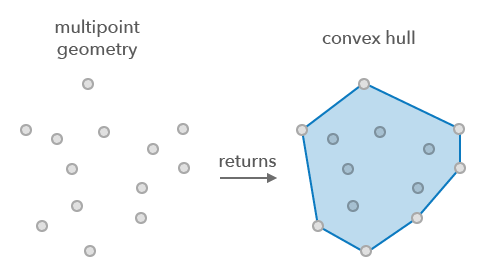

Brute forcing an answer will take $O(n^3)$ time as there are $O(n^2)$ possible vertices that will be drawn between every pair of points; and each vertix would take $O(n)$ to verify (see if every point it to one side of it). Divide and conquer can achieve a better performance by sorting $S$ by $x$ coordinates (one time $O(n\log n)$) and dividing it into $2$ segments (by $x$ coordinates), $A$ and $B$; calculating their $\text{CH}(\cdot)$ and combining them to return global $\text{CH}(S)$.

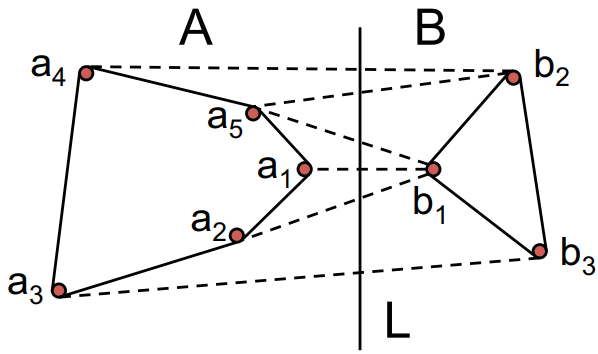

Where each point $a_i\in\text{CH}(A)$ is numbered maximising the $x$ coordiante, and $b_j\in\text{CH}(B)$ numbered to minimise the $x$ coordinates; $L$ is the vertical line separating $A$ and $B$, and $y(i,j)$ as the $y$ coordinate of the intersection between $L$ and the segment $(a_i,b_j)$.

It can be clearly seen that $2$ segments are required to merge the two convex hulls; an *upper-tangent* (no point is above it) and a *lower-tangent* (no point is under it).

Given $(a_i,b_j)$ is the *upper-tangent* then it is clear that only $a_i$ and $b_j$ are on the segment $(a_i,b_j)$, with all other vertices lie strictly below it. Taking any other pair $(a_l,a_k)$, if $l=i$ and $k\neq j$ then $y_i-\frac{y_j-y_i}{x_j-x_i}(x_k-x_i)>y_k$, meaning that the vertical projection of point $b_k$ to the *upper-tangent* will be higher than the point itself. As the segment $(a_l,b_k)$ is a straight line, at both endpoints that line is at or below segment $(a_i,b_j)$ and so $y(i,j)>y(l,k)$ regardless of where $L$ is relative to $x_i$ and $x_j$. By the same argument, $y(i,j)>y(l,k)$ for $l\neq i$ and $k=j$. If both $l\neq i$ and $k\neq j$, then both $a_l$ and $b_k$ are strictly below $(a_i,b_j)$ which means that there was no intersection with $(a_l,b_k)$ and so regardless where $L$ is relative to $x_i$ and $x_j$, $y(i,j)>y(l,k)$.

Therefore, $\forall a_i\in\text{CH}(A)$ and $b_j\in\text{CH}(B)$ if $(a_i,b_j)$ is the *upper-tangent* then $y(i,j)\geq y(l,k)$ (strict inequality when $(l,k)\neq(i,j)$).

Now suppose $(a_i,b_j)$ is such that $y(i,j)$ is maximal among all pairs $(a_l,b_k)$. Assume then that $(a_i,b_j)$ is not the *upper-tangent*, and so there must exist (without loss of generality) a point $b_q\in\text{CH}(B)$ that lies strictly above the segment $(a_i,b_j)$. Therefore, the segment $(a_i,b_q)$ is strictly above $(a_i,b_j)$ (except at $a_i$ where they meet), meaning that regardless of where $L$ is relative to $x_i^-$ and $x_j$, $y(i,q)>y(i,j)$. The same argument holds if $a_p\in\text{CH}(A)$ lies strictly above $(a_i,b_j)$, yielding $y(p,j)>y(i,j)$. Similarly to the above proof, for both $a_p\in\text{CH}(A)$ and $b_q\in\text{CH}(B)$ which are strictly above the segment $(a_i,b_j)$ means that $y(p,q)>y(i,j)$.

These are contradictions and so if $y(i,j)$ is maximal among all pairs, then $(a_i,b_j)$ is the *upper-tangent*. 

Therefore, $(a_i,b_j)$ is the *upper-tangent* **if and only if** it maximises $y(i,j)$. The arguments for the *lower-tangent* are exactly symmetric with inequalities reversed. From this, a divide and conquer algorithm can be designed as seen below

In [55]:
# O(nlogn) time O(n) space
function find_tangent(left::Vector{<:Tuple{<:Number,<:Number}}, right::Vector{<:Tuple{<:Number,<:Number}}, isParentLeftHandside::Bool)
    # list are treated as doubly linked list ordered in anti-clockwise ordering from point 
    # closest to L for Left and clockwise for Right

    L_x = (left[begin][1]+right[begin][1])/2
    function y(a_i::Tuple{<:Number,<:Number}, b_j::Tuple{<:Number,<:Number}, L_x::Number)
        m = (b_j[2] - a_i[2]) / (b_j[1] - a_i[1])
        L_y = a_i[2] + m*(L_x - a_i[1])
        return L_y       
    end

    function next(list::Vector{<:Tuple{<:Number,<:Number}}, i::Number)
        return mod(i,length(list))+1
    end

    function prev(list::Vector{<:Tuple{<:Number,<:Number}}, i::Number)
        return mod(i-2,length(list))+1
    end

    function search_tangent(left::Vector{<:Tuple{<:Number,<:Number}}, right::Vector{<:Tuple{<:Number,<:Number}}, L_x::Number; comp, step)
        i = 1
        j = 1
        while true
            move_right = comp(y(left[i], right[step(right, j)], L_x), y(left[i], right[j], L_x))
            move_left = comp(y(left[step(left, i)], right[j], L_x),y(left[i], right[j], L_x))
            if !(move_left || move_right)
                break
            end

            if move_right
                j = step(right, j)
            else
                i = step(left, i)
            end
        end
        return i, j
    end

    ui, uj = search_tangent(left, right, L_x, comp = >, step = next)
    li, lj = search_tangent(left, right, L_x, comp = <, step = prev)
    result = Tuple{<:Number,<:Number}[]

    i = ui
    push!(result, left[i])
    while i != li
        i = next(left, i)
        push!(result, left[i])
    end

    j = lj
    push!(result, right[j])
    while j != uj
        j = prev(right, j)
        push!(result, right[j])
    end

    if isParentLeftHandside
        starting_point = findfirst(==(maximum(result)), result)
        return [result[starting_point:1:end]; result[begin:1:starting_point-1]]
    end
    starting_point = findfirst(==(minimum(result)), result)
    return [result[starting_point:-1:begin]; result[end:-1:starting_point+1]]
end

function convex_hull!(points::Vector{<:Tuple{<:Number,<:Number}}, start::Integer=1, stop::Integer=length(points), isLeftHandSide::Bool=true, level::Integer=0, verbose::Bool=false)
    if stop-start < 1
        return points[start:stop]
    end
    sort!(points)
    halfway = floor(Integer, (stop-start)/2)
    left = convex_hull!(points, start, start+halfway, true, level+1)
    right = convex_hull!(points, start+halfway+1, stop, false, level+1)
    convex = deepcopy(find_tangent(left, right, isLeftHandSide))
    verbose && println("   "^level, "$left $right == $convex")

    return convex
end

# Note that For this algorithm to work, no two have the same x or the same y coordinates (creates infinite gradient segments); 
# and no three points form a line (using the L height to optimise breaks).
data = [(-10,-3), (-8,15), (-6,1), (-4,20), (-2,-5), (0,18), (2,-1), (4,25), (6,-10), (8,12), (10,-2), (12,22)]
convex_hull!(data)

7-element Vector{Tuple{Number, Number}}:
 (12, 22)
 (4, 25)
 (-4, 20)
 (-8, 15)
 (-10, -3)
 (6, -10)
 (10, -2)